In [ ]:
#COnstruct a linear model 

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [123]:
data=pd.read_csv("auto-mpg.csv")

In [124]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [125]:
data.shape

(398, 9)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [127]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [128]:
data.drop(columns=['car name'],inplace=True)

In [129]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [130]:
#In columnorigin replace 1 with america,2 with euraope and 3 with asia

In [131]:
data['origin']=data['origin'].replace({1:'america',2:'europe',3:'asia'})

In [132]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [133]:
#Implimenting one hot encoding
data=pd.get_dummies(data,columns=['origin'])

In [134]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,True,False,False


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    object 
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   model year      398 non-null    int64  
 7   origin_america  398 non-null    bool   
 8   origin_asia     398 non-null    bool   
 9   origin_europe   398 non-null    bool   
dtypes: bool(3), float64(3), int64(3), object(1)
memory usage: 23.1+ KB


In [136]:
data.drop(columns=['model year'],inplace=True)

In [137]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,True,False,False
1,15.0,8,350.0,165,3693,11.5,True,False,False
2,18.0,8,318.0,150,3436,11.0,True,False,False
3,16.0,8,304.0,150,3433,12.0,True,False,False
4,17.0,8,302.0,140,3449,10.5,True,False,False


In [138]:
hp_digit=pd.DataFrame(data.horsepower.str.isdigit())

In [139]:
data[hp_digit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,True,False,False
126,21.0,6,200.0,?,2875,17.0,True,False,False
330,40.9,4,85.0,?,1835,17.3,False,False,True
336,23.6,4,140.0,?,2905,14.3,True,False,False
354,34.5,4,100.0,?,2320,15.8,False,False,True
374,23.0,4,151.0,?,3035,20.5,True,False,False


In [140]:
hp_digit.head()

,horsepower
0,True
1,True
2,True
3,True
4,True


In [141]:
hp_digit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   horsepower  398 non-null    bool 
dtypes: bool(1)
memory usage: 530.0 bytes


In [142]:
hp_digit.head(35)

,horsepower
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [143]:
data=data.replace('?',np.NAN)

In [144]:
data[hp_digit['horsepower']==False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,True,False,False
126,21.0,6,200.0,NaN,2875,17.0,True,False,False
330,40.9,4,85.0,NaN,1835,17.3,False,False,True
336,23.6,4,140.0,NaN,2905,14.3,True,False,False
354,34.5,4,100.0,NaN,2320,15.8,False,False,True
374,23.0,4,151.0,NaN,3035,20.5,True,False,False


In [145]:
def fun():
    return 10

In [146]:
fun()


10

In [148]:
#Function without any specific names/anonymous function /lambda function
#no return statement
#expressed in single lines
p=lambda x:print("square=",x**2)

In [149]:
p(2)

square= 4


In [150]:
#define lambda function replace NAN with median

In [151]:
replacing=lambda x:x.fillna(x.median())

In [152]:
#apply

In [154]:
data=data.apply(replacing,axis=0)

In [155]:
data['horsepower']=data['horsepower'].astype('float64')

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cylinders       398 non-null    int64  
 2   displacement    398 non-null    float64
 3   horsepower      398 non-null    float64
 4   weight          398 non-null    int64  
 5   acceleration    398 non-null    float64
 6   origin_america  398 non-null    bool   
 7   origin_asia     398 non-null    bool   
 8   origin_europe   398 non-null    bool   
dtypes: bool(3), float64(4), int64(2)
memory usage: 20.0 KB


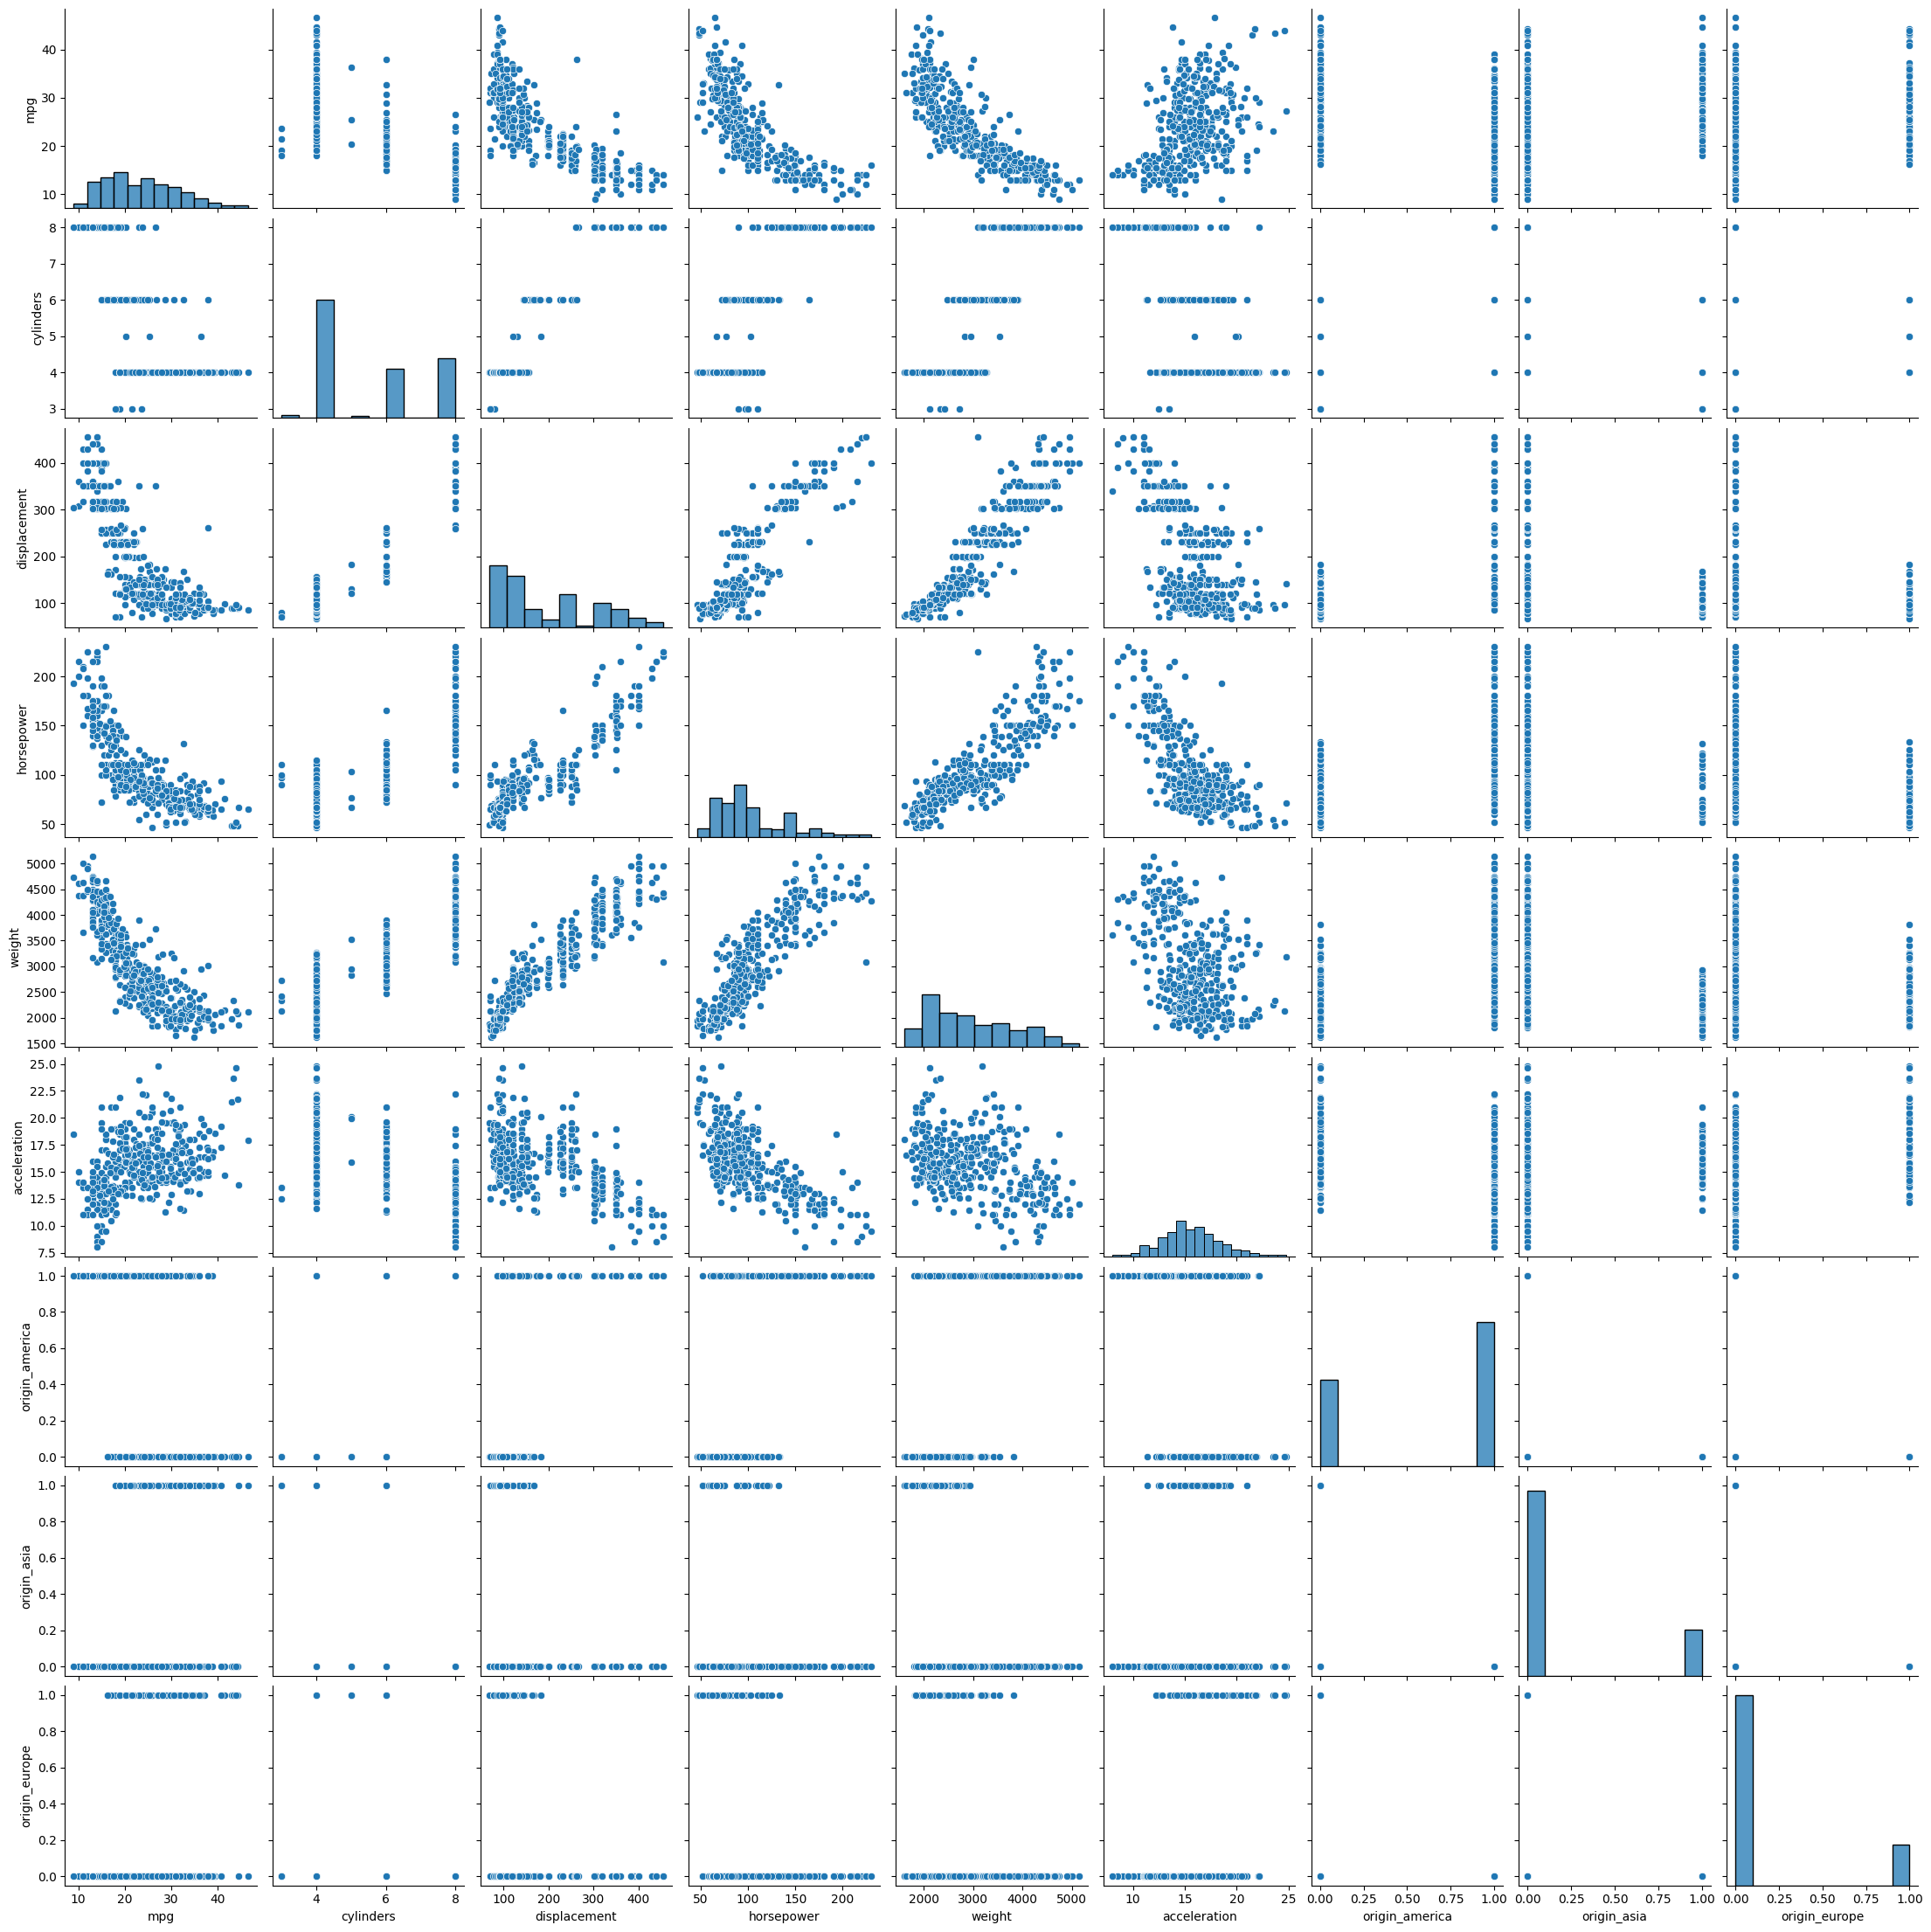

In [158]:
sns.pairplot(data)

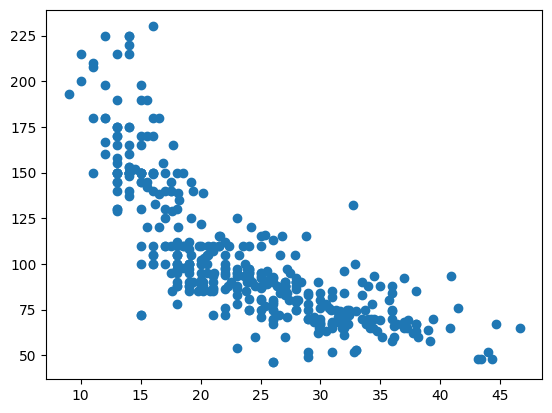

In [165]:
plt.scatter(x='mpg',y='horsepower',data=data)

<Axes: xlabel='cylinders', ylabel='weight'>

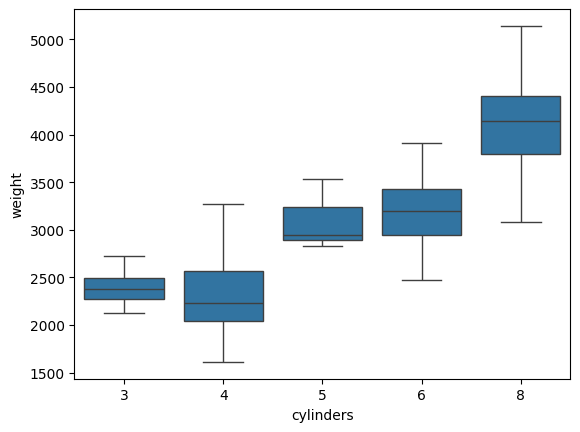

In [163]:
sns.boxplot(x='cylinders',y='weight',data=data)

In [166]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_america,origin_asia,origin_europe
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,-0.568192,0.442174,0.259022
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,0.604351,-0.396479,-0.352861
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,0.651407,-0.433505,-0.373886
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,0.485418,-0.318972,-0.282877
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,0.598398,-0.440817,-0.298843
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,-0.250806,0.109144,0.204473
origin_america,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,1.000000,-0.643317,-0.597198
origin_asia,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,-0.643317,1.000000,-0.229895
origin_europe,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.597198,-0.229895,1.000000


In [171]:
x=data.drop('mpg',axis=1)

In [172]:
y=data['mpg']

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [178]:
model = LinearRegression()

In [180]:
model.fit(x_train, y_train)

LinearRegression()

In [181]:
y_pred = model.predict(x_test)

In [183]:
from sklearn.metrics import mean_squared_error

In [184]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 13.30


In [185]:
model.score(x_test,y_test)

0.7725116212499805

In [186]:
model.score(x_train,y_train)

0.6946279278265037